In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib.patches import Rectangle,Circle


matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 25
import os 


In [2]:
import matplotlib.transforms as transforms

def movie_maker_capsules(folder_name, X, Y, Theta, T0, Tf, BOX_SIZE, ROD_LENGTH=0.6, ROD_WIDTH=0.1,make_ffmpeg_movie=False,Tstart=0,del_pngs=False):
    fig, ax1 = plt.subplots(figsize=(5, 5))
    radius = ROD_WIDTH / 2

    for time in range(T0, Tf):
        ax1.clear()
        Xnow = X[time]
        Ynow = Y[time]
        Thetanow = Theta[time]

        for posx, posy, theta in zip(Xnow, Ynow, Thetanow):
            ux, uy = np.cos(theta), np.sin(theta)

            # Draw rectangle centered at the particle position
            rect_length = ROD_LENGTH - 2 * radius
            rect_center = (posx, posy)

            # Rectangle defined with bottom left at (center - half-length in x and half-width in y)
            rect = Rectangle((-rect_length / 2, -ROD_WIDTH / 2), rect_length, ROD_WIDTH,
                             facecolor='red', edgecolor='none',rotation_point=rect_center)

            # Apply rotation around (posx, posy)
            t = transforms.Affine2D().rotate_around(0, 0, theta).translate(posx, posy) + ax1.transData
            rect.set_transform(t)
            ax1.add_patch(rect)

            # Circular caps
            cap1_x = posx - (ROD_LENGTH / 2) * ux + radius*ux
            cap1_y = posy - (ROD_LENGTH / 2) * uy + radius*uy
            cap2_x = posx + (ROD_LENGTH / 2) * ux -  radius*ux
            cap2_y = posy + (ROD_LENGTH / 2) * uy -  radius*uy

            cap1 = Circle((cap1_x, cap1_y), radius=radius, facecolor='red', edgecolor='none')
            cap2 = Circle((cap2_x, cap2_y), radius=radius, facecolor='red', edgecolor='none')

            ax1.add_patch(cap1)
            ax1.add_patch(cap2)

        ax1.set_title(f'Time {time}', fontsize=12, loc='left')
        ax1.set_xlim(0, BOX_SIZE)
        ax1.set_ylim(0, BOX_SIZE)
        ax1.set_xticks([])
        # ax1.set_xticklabels([0, BOX_SIZE])
        ax1.set_yticks([])
        ax1.set_xlabel(r'$x$')
        ax1.set_ylabel(r'$y$')
        ax1.set_aspect('equal', adjustable='box')
        plt.tight_layout()
        plt.savefig(f"{folder_name}/positions_{time:03d}.png", dpi=200, bbox_inches='tight')

    plt.show()
    if make_ffmpeg_movie:
        os.system(f"ffmpeg -y -r 9 -start_number {Tstart:03d} -i '{folder_name}/positions_%03d.png' -vf 'crop=trunc(iw/2)*2:trunc(ih/2)*2'  -pix_fmt yuv420p {folder_name}/movie.mp4")
    if del_pngs:
        os.system(f"rm {folder_name}/positions_*.png")
 
        
    return None

In [3]:
def one_frame(X, Y, Theta, T0, Tf, BOX_SIZE, ROD_LENGTH=0.6, ROD_WIDTH=0.1):
    
    radius = ROD_WIDTH / 2

    for time in range(T0, Tf):
        fig, ax1 = plt.subplots(figsize=(5, 5))
        ax1.clear()
        Xnow = X[time]
        Ynow = Y[time]
        Thetanow = Theta[time]

        for posx, posy, theta in zip(Xnow, Ynow, Thetanow):
            ux, uy = np.cos(theta), np.sin(theta)

            # Draw rectangle centered at the particle position
            rect_length = ROD_LENGTH - 2 * radius
            rect_center = (posx, posy)

            # Rectangle defined with bottom left at (center - half-length in x and half-width in y)
            rect = Rectangle((-rect_length / 2, -ROD_WIDTH / 2), rect_length, ROD_WIDTH,
                             facecolor='red', edgecolor='none',rotation_point=rect_center)

            # Apply rotation around (posx, posy)
            t = transforms.Affine2D().rotate_around(0, 0, theta).translate(posx, posy) + ax1.transData
            rect.set_transform(t)
            ax1.add_patch(rect)

            # Circular caps
            cap1_x = posx - (ROD_LENGTH / 2) * ux + radius*ux
            cap1_y = posy - (ROD_LENGTH / 2) * uy + radius*uy
            cap2_x = posx + (ROD_LENGTH / 2) * ux -  radius*ux
            cap2_y = posy + (ROD_LENGTH / 2) * uy -  radius*uy

            cap1 = Circle((cap1_x, cap1_y), radius=radius, facecolor='red', edgecolor='none')
            cap2 = Circle((cap2_x, cap2_y), radius=radius, facecolor='red', edgecolor='none')

            ax1.add_patch(cap1)
            ax1.add_patch(cap2)

        ax1.set_title(f'Time {time}', fontsize=12, loc='left')
        ax1.set_xlim(0, BOX_SIZE)
        ax1.set_ylim(0, BOX_SIZE)
        ax1.set_xticks([])
        # ax1.set_xticklabels([0, BOX_SIZE])
        ax1.set_yticks([])
        ax1.set_xlabel(r'$x$')
        ax1.set_ylabel(r'$y$')
        ax1.set_aspect('equal', adjustable='box')
        plt.tight_layout()
        plt.show()
        

    
    return None

In [4]:
def velocity_calc(X, Y, Dt, BOX_SIZE):
    Steps, N = X.shape
    
    Vx = np.zeros((Steps-1,N))
    Vy = np.zeros((Steps-1,N))
    for t in range(Steps-1):
        dX = X[t+1] - X[t]
        dY = Y[t+1] - Y[t]
        dX = (dX + BOX_SIZE/2) % BOX_SIZE - BOX_SIZE/2
        dY = (dY + BOX_SIZE/2) % BOX_SIZE - BOX_SIZE/2
        Vx[t] = dX/Dt
        Vy[t] = dY/Dt

    V  = np.hypot(Vx, Vy)
    return Vx, Vy, V

def polar_OP(Theta):
    Px = np.mean(np.cos(Theta),axis=1)
    Py = np.mean(np.sin(Theta),axis=1)
    return np.sqrt(Px**2+Py**2),Px,Py

def nematic_OP(Theta):
    Qx = np.mean(np.cos(2*Theta),axis=1)
    Qy = np.mean(np.sin(2*Theta),axis=1)
    return np.sqrt(Qx**2+Qy**2),Qx,Qy

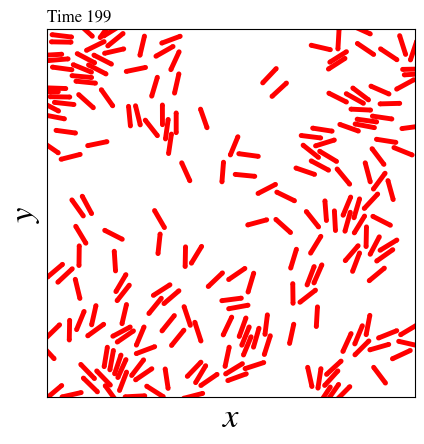

'Dt_0.01_Nparticles_202_T_2000_box_30_cutoff_4_kalign_11_khardcore_0_kspring_3_lo_3_rate_0.3_rod_length_2_rod_radius_0.2'

In [76]:
box=30
cutoff=4
Nparticles=202
T=2000
Dt=0.01
rod_length=2
rod_radius=0.2
khardcore=0
kspring=3
rate=0.3
lo=3
kalign=11

folder_name=f"Dt_{Dt}_Nparticles_{Nparticles}_T_{T}_box_{box}_cutoff_{cutoff}_kalign_{kalign}_khardcore_{khardcore}_kspring_{kspring}_lo_{lo}_rate_{rate}_rod_length_{rod_length}_rod_radius_{rod_radius}"
positions_file = f"{folder_name}/particle_positions_{folder_name}.dat"
squared_disp_file = f"{folder_name}/squared_disp_{folder_name}.dat"
mv_not_mov_file = f"{folder_name}/moving_not_moving_{folder_name}.dat"

X,Y,Theta_b,Theta_p = np.loadtxt(positions_file, unpack=True)
vx_post,vy_post,v_post = np.loadtxt(folder_name+"/velocity_post.dat",unpack = True)
v_post = v_post.reshape((T,Nparticles))
Mv_not_mv = np.loadtxt(mv_not_mov_file,unpack=True)
Steps = len(X)//Nparticles
X = X.reshape((Steps, Nparticles))
Y = Y.reshape((Steps, Nparticles))
Mv_not_mv = Mv_not_mv.reshape((T,Nparticles))

Theta_b = Theta_b.reshape((Steps,Nparticles))

Theta_p = Theta_p.reshape((Steps,Nparticles))
Vx,Vy,V = velocity_calc(X,Y,Dt,box)
P,Px,Py = polar_OP(Theta_b)
Q,Qx,Qy = nematic_OP(Theta_b)
Time = np.arange(0,Steps)*Dt
time,sd = np.loadtxt(squared_disp_file,unpack=True)
one_frame(X,Y,Theta_b,Steps-1,Steps,box,rod_length,2*rod_radius)
V_normalized = np.zeros((T,Nparticles))
for n in range(Nparticles):
    V_normalized[:,n] = v_post[:,n]/np.max(v_post[:,n])
folder_name

In [ ]:

movie_maker_capsules(folder_name,X,Y,Theta_b,0,200,box,rod_length,2*rod_radius,make_ffmpeg_movie=True,Tstart=0,del_pngs=True)
# ffmpeg -r 5 -start_number 000 -i 'positions_%03d.png' -vf "crop=trunc(iw/2)*2:trunc(ih/2)*2"  -pix_fmt yuv420p movie.mp4


# Mean Squared Displacement

In [ ]:

plt.figure(figsize=(5,5),layout='tight')
plt.plot(time,sd,lw=1.5,marker='o',ms=2)
plt.xlabel('time')
plt.ylabel(r'$\langle \Delta r^2 \rangle$')
# plt.xlim(0,0.4)
plt.show()


# Speed

In [ ]:
plt.figure(figsize=(5,5),layout='tight')
plt.xlabel('time')
plt.ylabel(r"$V$")
plt.plot(time*Dt,v_post[:,54],lw=1.5,marker='o',ms=2)
plt.figure(figsize=(5,5),layout='tight')

plt.plot(Time[:-1]*Dt,V[:,54],lw=1.5,marker='o',ms=2)

plt.show()


## Speed Distribution

In [ ]:
plt.figure(figsize=(5,5),layout='tight')
plt.xlabel('time')
plt.ylabel(r'$v/v_{\text{max}}$')
plt.plot(np.arange(0,Steps-1)*Dt,V_normalized[:,3],lw=1.5,marker='o',ms=2)
plt.show()

In [7]:
from scipy.optimize import curve_fit

def exp(x,a,b):
    return a*np.exp(-b*x)


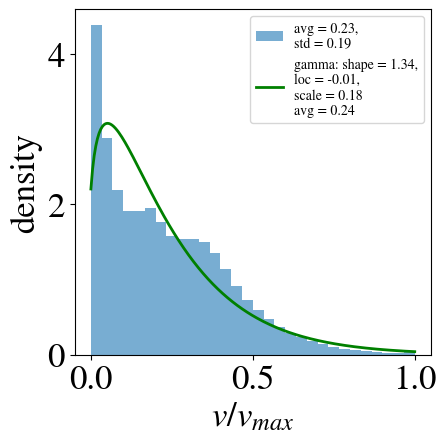

In [82]:
from scipy.stats import gamma

"""
fit gamma distribution to normalized by max speed in trajectories
"""
speeds = np.hstack(V_normalized)
mask = (speeds > 0) & (speeds <= box)
speeds = speeds[mask]
hist,bins_edges = np.histogram(speeds,bins=40,density=True)
bin_centers = 0.5*(bins_edges[1:] + bins_edges[:-1])

params = gamma.fit(speeds,floc=-0.01,scale=np.mean(speeds))
shape,loc, scale = params
x = np.linspace(0,max(speeds),200)
params1 = curve_fit(exp,bin_centers,hist)
a,b = params1[0]
mean_simulated_data= speeds.mean()
# max_phys_speed = 200
# cut_speeds = speeds[speeds < max_phys_speed]
plt.figure(figsize=(5,5),layout = 'tight')
plt.hist(speeds,bins=30,label=f'avg = {speeds.mean():.2f},\nstd = {speeds.std():.2f}',alpha=0.6,density=True)
# plt.plot(x, exp(x,*params1[0]), 'r-', lw=2, label=f'exp: 1/a = {1/a:.2f},\n1/b = {1/b:.2f}')
# plt.plot(x, gamma.pdf(x, 1,0,speeds.mean()), 'g-', lw=2, label=f'gamma: shape = {shape:.2f},\nloc = {loc:.2f},\nscale = {scale:.2f}\navg = {shape*scale:.2f}')
plt.plot(x, gamma.pdf(x, shape,loc,scale), 'g-', lw=2, label=f'gamma: shape = {shape:.2f},\nloc = {loc:.2f},\nscale = {scale:.2f}\navg = {shape*scale:.2f}')

# plt.semilogy()
plt.legend(fontsize=10)
plt.xlabel(r'$v/v_{max}$')
plt.ylabel('density')
plt.show()

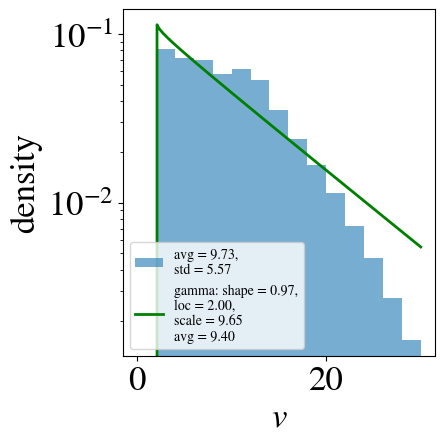

In [87]:
from scipy.stats import gamma

"""
fit gamma distribution to speed data. 
"""
speeds = np.hstack(v_post)
mask = (speeds > 2) & (speeds <= box)
speeds = speeds[mask]
hist,bins_edges = np.histogram(speeds,bins=40,density=True)
bin_centers = 0.5*(bins_edges[1:] + bins_edges[:-1])

params = gamma.fit(speeds, loc=1,scale=np.mean(speeds))
shape,loc, scale = params
x = np.linspace(0,max(speeds),200)
# params1 = curve_fit(exp,bin_centers,hist)
# a,b = params1[0]
# max_phys_speed = 200
# cut_speeds = speeds[speeds < max_phys_speed]
plt.figure(figsize=(5,5),layout = 'tight')
plt.hist(speeds,bins=np.arange(0,max(speeds)+2,2),label=f'avg = {speeds.mean():.2f},\nstd = {speeds.std():.2f}',alpha=0.6,density=True)
# plt.plot(x, exp(x,*params1[0]), 'r-', lw=2, label=f'exp: 1/a = {1/a:.2f},\n1/b = {1/b:.2f}')
# plt.plot(x, gamma.pdf(x, 1,0,speeds.mean()), 'g-', lw=2, label=f'gamma: shape = {shape:.2f},\nloc = {loc:.2f},\nscale = {scale:.2f}\navg = {shape*scale:.2f}')
plt.plot(x, gamma.pdf(x, shape,loc,scale), 'g-', lw=2, label=f'gamma: shape = {shape:.2f},\nloc = {loc:.2f},\nscale = {scale:.2f}\navg = {shape*scale:.2f}')
# plt.xlim(0,20)
# plt.vlines([1], 0, 0.1, color='k', linestyle='--', lw=0.9)
# # plt.xticks(np.arange(0,max(speeds)+7,7))
plt.semilogy()
plt.legend(fontsize=10)
plt.xlabel(r'$v$')
plt.ylabel('density')
plt.show()

In [ ]:

speeds = np.hstack(v_pre)
# mask = (speeds >= 0) & (speeds <= box)
# speeds = speeds[mask]
# hist,bins_edges = np.histogram(speeds,bins=40,density=True)
# bin_centers = 0.5*(bins_edges[1:] + bins_edges[:-1])

# params = gamma.fit(speeds,floc=-0.5,scale=6)
# shape,loc, scale = params
# x = np.linspace(0,max(speeds),200)
# params1 = curve_fit(exp,bin_centers,hist)
# a,b = params1[0]
# max_phys_speed = 200
# cut_speeds = speeds[speeds < max_phys_speed]
plt.figure(figsize=(5,5),layout = 'tight')
plt.hist(speeds,bins=np.arange(0,max(speeds)+1,2),label=f'avg = {speeds.mean():.2f},\nstd = {speeds.std():.2f}',alpha=0.6,density=True)
# plt.plot(x, exp(x,*params1[0]), 'r-', lw=2, label=f'exp: 1/a = {1/a:.2f},\n1/b = {1/b:.2f}')
# plt.plot(x, gamma.pdf(x, 1,0,speeds.mean()), 'g-', lw=2, label=f'gamma: shape = {shape:.2f},\nloc = {loc:.2f},\nscale = {scale:.2f}\navg = {shape*scale:.2f}')
# plt.plot(x, gamma.pdf(x, shape,loc,scale), 'g-', lw=2, label=f'gamma: shape = {shape:.2f},\nloc = {loc:.2f},\nscale = {scale:.2f}\navg = {shape*scale:.2f}')
# plt.xlim(0,40)
# plt.vlines([0,3.5,8.8], 0,0.4, color='k', linestyle='--', lw=0.9)
plt.xticks(np.arange(0,max(speeds),5))
# plt.semilogy()
plt.legend(fontsize=10)
plt.xlabel(r'$v$')
plt.ylabel('density')
plt.show()

## Moving not moving

### Directly from the code

In [ ]:
def mov_not_mov(S):
    change_indices = np.where(np.diff(S) != 0)[0] + 1

    # Split the array at those indices
    groups = np.split(S, change_indices)

    # Count the lengths of runs
    zeros = [len(g) for g in groups if g[0] == 0]
    ones = [len(g) for g in groups if g[0] == 1]
    
    return ones,zeros

In [ ]:

time_complete = np.arange(0,T)*Dt
plt.figure(figsize=(5,5),layout='tight')
plt.plot(time_complete,Mv_not_mv[:,1],lw=1.5)
plt.xlabel('time')
plt.xlim((0,2))
plt.ylabel(r'$\tilde{s}$')
plt.show()

In [ ]:
mov_nparticles = []
all_mov = []
not_mov_nparticles = []
all_not_mov = []
for n in range(Nparticles):
    mov,not_mov = mov_not_mov(Mv_not_mv[:,n])
    
    mov_nparticles.append(mov)
    not_mov_nparticles.append(not_mov)
    all_mov += mov
    all_not_mov += not_mov


In [ ]:
# all_mov = np.hstack(mov)
# all_not_mov = np.hstack(not_mov)
fig = plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
nhist,bins,_ =plt.hist(all_not_mov, bins=np.arange(1, max(all_not_mov) + 2) - 0.5, color='skyblue', edgecolor='black',density=True,label=f'avg = {np.mean(all_not_mov):.2f},\nstd = {np.std(all_not_mov):.2f}')
params1 = curve_fit(exp,bins[:-1],nhist)
a1,b1 = params1[0]
plt.plot(bins[:-1], exp(bins[:-1],*params1[0]), 'b-', lw=2, label=f'exp: 1/a = {1/a1:.2f},\n1/b = {1/b1:.2f}')
plt.legend(fontsize=12,handlelength=1.0)
plt.title('Not Moving',fontsize=20)
plt.xlabel('consecutive time steps')
plt.ylabel('Frequency')
plt.semilogy()


plt.subplot(1, 2, 2)
mhist,mbins,_ = plt.hist(all_mov, bins=np.arange(1, max(all_mov) + 2) - 0.5, color='salmon', edgecolor='black',density=True,label=f'avg = {np.mean(all_mov):.2f},\nstd = {np.std(all_mov):.2f}')
params2 = curve_fit(exp,mbins[:-1],mhist)
a2,b2 = params2[0]
plt.plot(mbins[:-1], exp(mbins[:-1],*params2[0]), 'r-', lw=2, label=f'exp: 1/a = {1/a2:.2f},\n1/b = {1/b2:.2f}')
plt.title('Moving',fontsize=20)
plt.xlabel('consecutive time steps')
plt.ylabel('Frequency')
plt.legend(fontsize=12,handlelength=1.0)
plt.tight_layout()
plt.semilogy()
fig.suptitle('code',fontsize=24,x=0.55,y=1.03)

plt.show()

## From the simulated data

In [ ]:
def mov_not_mov2(A,th):
    """
    Calculate moving and non moving steps.
    
    
    -----------
    A = array with the values to be analyzed, it can be the smoothed speed or the speed 
    
    th = threshold (taken from the prob of moving and prob of not moving)
    
    Return
    -------
    
    tuple: 
    
    (ns,ms,signal) = (list with NOT moving steps, list with MOVING steps,binary signal (+1 if this step and the next is above threshold, 0 if below))
     
    """
    
    # mask is an array that in each element has True if the value of array A is less than the threshold
    mask = A <= th
    signal = [] # binary signal

    
    n=0 # counter for non moving steps
    m=0 # counter for moving steps
    ns=[] # list with consecutive non moving steps
    ms = [] # list with consecutive moving steps
    
    for i in range(len(A)-1):
        
        if mask[i] == True and mask[i+1] == True: # if this value in A and the next are below the threshold
            
            # print('n=',n)
            if m!=0: # append the current running value of m if we changed from moving to non moving
                
                ms.append(m)
            m=0 # reset the counter for moving steps
            signal.append(0) # append 0 to the signal
            n+=1 # begin counting non moving steps
        elif mask[i] == False or mask[i+1] == False: 
            # same as before but with the opposite condition
            if n!=0:
                
                ns.append(n)
            n=0
            signal.append(1)
            m+=1
        if i+1 == len(A)-1: 
            # if we are in the last element of A, we append the last values of n,m and the signal
            if mask[i] == False or mask[i+1] == False:
                signal.append(1)
                ms.append(m)
            else:
                signal.append(0)
                ns.append(n)
    return ns,ms,signal, mask

In [ ]:
mov_nparticles_data = []
all_mov_data = []
not_mov_nparticles_data  = []
all_not_mov_data = []
for n in range(Nparticles):
    ns,ms,signal, mask = mov_not_mov2(V_normalized[:,n],mean_simulated_data)
    
    mov_nparticles_data.append(mov)
    not_mov_nparticles_data.append(not_mov)
    all_mov_data += mov
    all_not_mov_data += not_mov

In [ ]:
# all_mov = np.hstack(mov)
# all_not_mov = np.hstack(not_mov)
fig = plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
nhist,bins,_ =plt.hist(all_not_mov_data, bins=np.arange(1, max(all_not_mov_data) + 2) - 0.5, alpha=0.8,color='blue', edgecolor='black',density=True,label=f'avg = {np.mean(all_not_mov_data):.2f},\nstd = {np.std(all_not_mov_data):.2f}')
params1 = curve_fit(exp,bins[:-1],nhist)
a1,b1 = params1[0]
plt.plot(bins[:-1], exp(bins[:-1],*params1[0]), 'lightgreen', lw=2, label=f'exp: 1/a = {1/a1:.2f},\n1/b = {1/b1:.2f}')
plt.legend(fontsize=12,handlelength=1.0)
plt.title('Not Moving',fontsize=20)
plt.xlabel('consecutive time steps')
plt.ylabel('Frequency')
plt.semilogy()


plt.subplot(1, 2, 2)
mhist,mbins,_ = plt.hist(all_mov_data, bins=np.arange(1, max(all_mov_data) + 2) - 0.5, color='red', alpha=0.8,edgecolor='black',density=True,label=f'avg = {np.mean(all_mov_data):.2f},\nstd = {np.std(all_mov_data):.2f}')
params2 = curve_fit(exp,mbins[:-1],mhist)
a2,b2 = params2[0]
plt.plot(mbins[:-1], exp(mbins[:-1],*params2[0]), 'pink', lw=2, label=f'exp: 1/a = {1/a2:.2f},\n1/b = {1/b2:.2f}')
plt.title('Moving',fontsize=20)
plt.xlabel('consecutive time steps')
plt.ylabel('Frequency')
plt.legend(fontsize=12,handlelength=1.0)
plt.tight_layout()
plt.semilogy()

fig.suptitle('simulated data',fontsize=24,x=0.55,y=1.03)

plt.show()

# Polar and Nematic Order

In [ ]:
plt.figure(figsize=(5,5),layout='tight')
plt.xlabel('time')
# plt.ylabel(r"$P$")
plt.plot(Time,P,label=r'$P$ (polar order)',lw=1.5)
plt.plot(Time,Q,label=r'$Q$ (nematic order)',lw=1.5)
plt.legend(fontsize=15)
plt.show()

# Local fields

In [ ]:
def compute_local_fields(X, Y, Theta, BOX_SIZE, nbins):
    """
    X, Y, Theta : 1D arrays of length N_particles
    BOX_SIZE     : box side length (assumed square [0,BOX_SIZE]^2)
    nbins        : number of bins per dimension
    
    Returns: 
      rho  : (nbins,nbins) density
      pol  : (nbins,nbins) polar order magnitude
      nem  : (nbins,nbins) nematic order magnitude
      xedges, yedges : bin edges for plotting
    """
    N = X.size
    # bin edges
    xedges = np.linspace(0, BOX_SIZE, nbins+1)
    yedges = np.linspace(0, BOX_SIZE, nbins+1)
    dx = BOX_SIZE/nbins
    print(dx)
    
    # 1) density
    counts, _, _ = np.histogram2d(X, Y, bins=[xedges, yedges])
    rho = counts / (dx*dx)  # if you want #/area
    
    # 2) polar sums
    c1, _, _ = np.histogram2d(X, Y, bins=[xedges, yedges], weights=np.cos(Theta))
    s1, _, _ = np.histogram2d(X, Y, bins=[xedges, yedges], weights=np.sin(Theta))
    # normalize by counts (avoid division by zero)
    with np.errstate(invalid='ignore', divide='ignore'):
        pol = np.sqrt(c1**2 + s1**2) / counts
    
    # 3) nematic sums (2θ)
    c2, _, _ = np.histogram2d(X, Y, bins=[xedges, yedges], weights=np.cos(2*Theta))
    s2, _, _ = np.histogram2d(X, Y, bins=[xedges, yedges], weights=np.sin(2*Theta))
    with np.errstate(invalid='ignore', divide='ignore'):
        nem = np.sqrt(c2**2 + s2**2) / counts
    
    # Wherever counts==0, set fields to NaN for cleaner plotting
    pol[counts==0] = np.nan
    nem[counts==0] = np.nan
    
    return rho, pol, nem, xedges, yedges

def plot_heatmaps(rho, pol, nem, xedges, yedges):
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    fig, axes = plt.subplots(1,3, figsize=(14,4))
    
    
    im0 = axes[0].imshow(rho.T, origin='lower', extent=extent,
                         cmap='viridis')
    axes[0].set_title("Density",fontsize=19)
    fig.colorbar(im0, ax=axes[0])
    
    im1 = axes[1].imshow(pol.T, origin='lower', extent=extent,
                         vmin=0, vmax=1, cmap='Blues')
    axes[1].set_title("Polar order",fontsize=19)
    fig.colorbar(im1, ax=axes[1])
    
    im2 = axes[2].imshow(nem.T, origin='lower', extent=extent,
                         vmin=0, vmax=1, cmap='Blues')
    axes[2].set_title("Nematic order",fontsize=19)
    fig.colorbar(im2, ax=axes[2])
    
    for ax in axes:
        ax.set_xlabel('x'); ax.set_ylabel('y')
    plt.tight_layout()
    plt.show()

In [ ]:
time = Steps-1
Xnow = X[time]
Ynow = Y[time]
Theta_bnow = Theta_b[time]
BOX_SIZE = box
nbins = 6
rho, pol, nem, xedges, yedges = compute_local_fields(Xnow,Ynow,Theta_bnow,BOX_SIZE,nbins)
plot_heatmaps(rho, pol, nem, xedges, yedges)